In [1]:
import astropy.units as u
import galarp as grp

from gala import dynamics as gd

from matplotlib import pyplot as plt

import numpy as np

from astropy.table import Table

In [5]:
pset = grp.ExponentialParticleSet(5, 0.1)
pot = grp.builtins.satellite_potentials.JZ2023_Satellite()

pset.seed(10000, pot)

Number of particles: 10000
First 5 R-coordinates: [6.07119703 4.56580877 0.75009519 5.00143957 3.80275631]
First 5 z-coordinates: [ 0.04447562  0.00187486 -0.22600698 -0.13229606  0.01704675]


In [6]:

def save(pset, fn):
    x,y,z = pset.positions
    vx, vy, vz = pset.positions

    np.save(fn, np.array([x,y,z,vx,vy,vz]))

save(pset, 'particles')

[Text(0.5, 0, 'x'), Text(0, 0.5, 'z')]

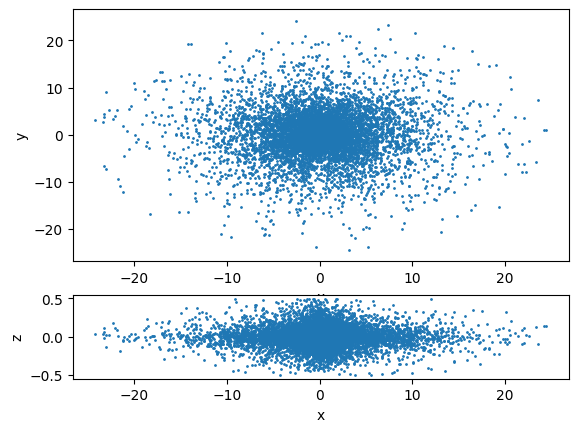

In [7]:
x,y, z = pset.positions

fig, ax = plt.subplots(2,1, height_ratios=[3,1])

ax[0].scatter(x, y, s=1)

ax[0].set(xlabel='x', ylabel='y')

ax[1].scatter(x,z, s=1)
ax[1].set(xlabel='x', ylabel='z')




In [8]:
def to_phase_space_positions(pset):
    return gd.PhaseSpacePosition(pos=pset.positions, vel=pset.velocities)




(10000, 3) (10000, 3)
(10000, 3)
9947183.943243459


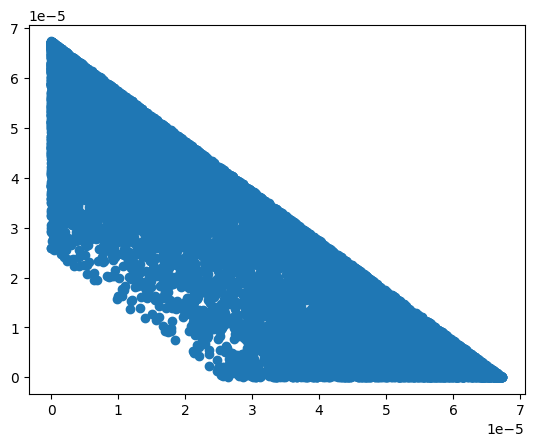

In [9]:
satellite_potential=grp.builtins.satpots.JZ2023_Satellite()
wind=grp.builtins.host_winds.BasicClusterWind()
rho_icm=grp.builtins.host_winds.BasicClusterDensity()

x, y, z = pset.phase_space_positions().xyz
vx, vy, vz = pset.phase_space_positions().v_xyz

q = np.stack([x,y,z], axis=1)
p = np.stack([vx,vy,vz], axis=1)

print(q.shape, p.shape)

wind_test = wind.evaluate(0)

v_rel = wind_test - p

a_ram = (v_rel ** 2) * (rho_icm.evaluate(0) / pset.surface_density())
print(a_ram.shape)

a_ram = a_ram.T
plt.scatter(a_ram[0], a_ram[1])

print(pset.sigma_gas)

In [10]:
sim = grp.RPSim(particles=pset)

orbits = sim.run(integration_time=1000 * u.Myr)



        Use Integrator call method instead. [galarp.core.sim]


In [11]:
grp.plotting.animated_hexbin_plot(orbits, n_frames=20)